In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


In [2]:
numericals_out = pd.read_csv('../data/raw/numerical_no_outlier.csv')

In [3]:
numericals_out.head()

,sqft_above,sqft_lot15,sqft_living15
0,1180,5650,1340
1,2170,7639,1690
2,770,8062,2720
3,1050,5000,1360
4,1680,7503,1800


In [4]:
num4= numericals_out.copy()

now we have dropped outliers, we will try to correct skewness

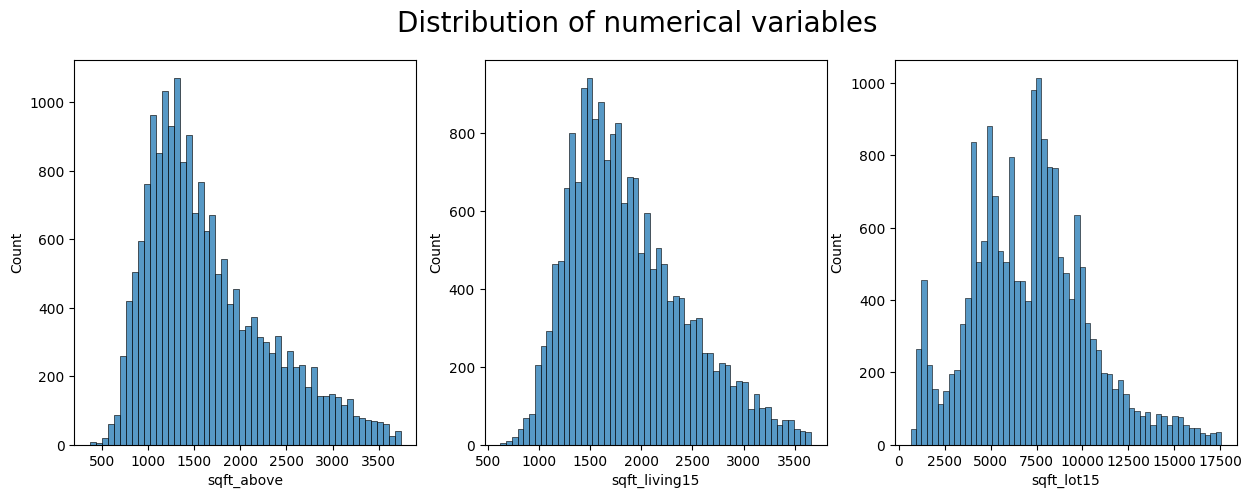

In [7]:
# Specify the list of numerical columns you want to plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of numerical variables', fontsize=20)
sns.histplot(ax=axes[0], data=num4, x='sqft_above')
sns.histplot(ax=axes[1], data=num4, x='sqft_living15')
sns.histplot(ax=axes[2], data=num4, x='sqft_lot15')
plt.show()

In [8]:
numericals_out.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,18858.0,1652.465797,659.232989,370.0,1160.0,1490.0,2030.0,3740.0
sqft_lot15,18858.0,7153.947608,3169.734307,651.0,5000.0,7210.0,9000.0,17550.0
sqft_living15,18858.0,1871.696680,565.172400,620.0,1450.0,1770.0,2210.0,3660.0


In [9]:
#return a table of skewness of each column
numericals_out.skew(axis = 0, skipna = True)

sqft_above       0.889261
sqft_lot15       0.440601
sqft_living15    0.722842
dtype: float64

The skewness after dropping outliers is looking good. so we won´t transform for skewness

In [9]:
import sklearn

it worked sqt_livin15,sqt_lot15 and sqt_above. but not so much on the rest
so we will only use it on the first 3

In [10]:
#load categorical data
cat4 = pd.read_csv('../data/raw/categorical.csv')
target4 = pd.read_csv('../data/cleaned/target.csv')

BEFORE WE CONCAT CATEGORICAL AND NUMERICAL DATA, and then further split. we want to see what needs to be done to our categorical data

In [11]:
#defining a function to see unique values in each column
def unique_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [12]:
unique_values(cat4)

id : [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
waterfront : [0 1]
view : [0 3 4 2 1]
condition : [3 5 4 1 2]
grade : [ 7  6  8 11  9  5 10 12  4  3 13]
yr_built : [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
yr_renovated : [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971

In [13]:
#vaalue count for yr_renovated
cat4['yr_renovated'].value_counts()


yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [14]:
#majority of data is 0, so we will drop the column, so we will drop the column
cat4.drop(columns=['yr_renovated'], inplace=True)

## Handling  year built
 we assume using energy star guidelines(https://www.energystar.gov/newhomes/how_homes_earn_label/history) that energy efficiency became incorporated into architectural foresights in building construction.

For that reason, we will classify house built on 5 gradings based on new release of energy star guidelines. 
1. Houses built before 1995 features outside the guideline (0)
2. Houses built between 1995 and 2011 (1)
3. Houses built after 2011

we understand that not all buildings may have adopted these practices, and our data set doesn´t provide us with any detail on their conformation to the  standardization and so since we are using it in conjuction with other grading like the king grading system and house condition, we will keep it.

In [15]:
#apply a function to itinerate through two column and add a new column  with 1 if house was built before 1995, 2 if between 1995-2011, 3 if after 2011
def categorize_year(year):
    if year < 1995:
        return 1
    elif 1995 <= year <= 2011:
        return 2
    else:
        return 3

In [16]:
#apply function to column
cat4['yr_built_cat'] = cat4['yr_built'].apply(categorize_year)

In [17]:
#check if it worked
cat4.head()

,id,waterfront,view,condition,grade,yr_built,zipcode,lat,long,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat
0,7129300520,0,0,3,7,1955,98178,47.5112,-122.257,3,1.00,1,1.0,1
1,6414100192,0,0,3,7,1951,98125,47.7210,-122.319,3,2.25,2,2.0,1
2,5631500400,0,0,3,6,1933,98028,47.7379,-122.233,2,1.00,1,1.0,1
3,2487200875,0,0,5,7,1965,98136,47.5208,-122.393,4,3.00,3,1.0,1
4,1954400510,0,0,3,8,1987,98074,47.6168,-122.045,3,2.00,1,1.0,1


In [18]:
#drop yr_built column
cat4.drop(columns=['yr_built'], inplace=True)

## Handling location
For our modeling we will use zipcodes<br>

Focusing on the first three numbers which represents the:
1.  the first digit represents a certain groups of US states
2.  the second and third digits represent region . so we will focus on the regions to avoid overfitting or affecting the regression model


In [19]:
#on zipcode, we will split the first the first three digits and create a new column with it called zip
cat5=cat4.copy()
#convert zipcode to string
cat4['zipcode'] = cat5['zipcode'].astype(str)

#split zipcode
cat4['zip'] = cat4['zipcode'].str[:3]


In [20]:
cat4.head()

,id,waterfront,view,condition,grade,zipcode,lat,long,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip
0,7129300520,0,0,3,7,98178,47.5112,-122.257,3,1.00,1,1.0,1,981
1,6414100192,0,0,3,7,98125,47.7210,-122.319,3,2.25,2,2.0,1,981
2,5631500400,0,0,3,6,98028,47.7379,-122.233,2,1.00,1,1.0,1,980
3,2487200875,0,0,5,7,98136,47.5208,-122.393,4,3.00,3,1.0,1,981
4,1954400510,0,0,3,8,98074,47.6168,-122.045,3,2.00,1,1.0,1,980


In [21]:

cat4.to_csv('../data/raw/categorical_first_cleaned.csv', index=False)

In [22]:
#drop zipcode, longituide abd latituide to reduce variables column

cat4.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

In [23]:
cat4.head()

,id,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip
0,7129300520,0,0,3,7,3,1.00,1,1.0,1,981
1,6414100192,0,0,3,7,3,2.25,2,2.0,1,981
2,5631500400,0,0,3,6,2,1.00,1,1.0,1,980
3,2487200875,0,0,5,7,4,3.00,3,1.0,1,981
4,1954400510,0,0,3,8,3,2.00,1,1.0,1,980


In [24]:
#save file
cat4.to_csv('../data/cleaned/categorical_final_copy.csv', index=False)

In [25]:
#now we will test for multicollinearity in the numerical columns

correlation_matrix = num4.corr().round(2)

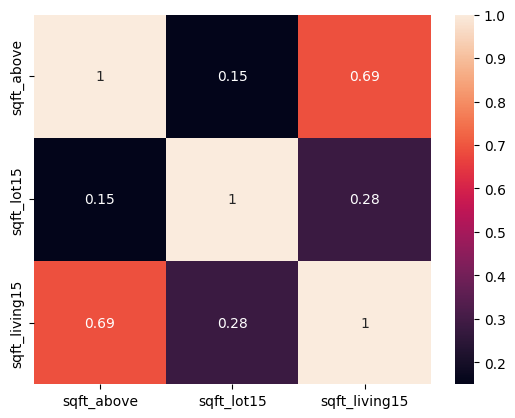

In [26]:
#visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

There appears to be no multicollinearity between the columns, so we will keep all columns

NOW WE CONCAT NUM4 AND CAT4

Mindful that num4, outliers have been taken away, so we need to ensure it matches

In [27]:
#concat num4 and cat4 and drop rows with NaN
df = pd.concat([num4, cat4, target4], axis=1)
df.shape

(21597, 16)

In [28]:
df.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'id', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'bathrooms', 'sqft_basement_cat',
       'floors', 'yr_built_cat', 'zip', 'id', 'price'],
      dtype='object')

In [29]:
#drop rows with NaN
df.dropna(inplace=True)

In [30]:
df.shape

(18858, 16)

In [31]:
df.reset_index(drop=True, inplace=True)

In [32]:
df.shape

(18858, 16)

In [33]:
#drop columns that are not needed
df.drop(columns=['id', 'id'], inplace=True)

In [36]:
#check zip column
df['zip'].value_counts()

zip
0    11027
1     7831
Name: count, dtype: int64

In [34]:
#encode zip column use label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['zip'] = le.fit_transform(df['zip'])

In [35]:
df.head()

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip,price
0,1180.0,5650.0,1340.0,0,0,3,7,3,1.00,1,1.0,1,1,221900
1,2170.0,7639.0,1690.0,0,0,3,7,3,2.25,2,2.0,1,1,538000
2,770.0,8062.0,2720.0,0,0,3,6,2,1.00,1,1.0,1,0,180000
3,1050.0,5000.0,1360.0,0,0,5,7,4,3.00,3,1.0,1,1,604000
4,1680.0,7503.0,1800.0,0,0,3,8,3,2.00,1,1.0,1,0,510000


In [37]:
#save cleaned data
df.to_csv('../data/cleaned/data_without_outlier.csv', index=False)